Data about every division (a vote by representatives in the Australian Parliament) can be obtained from theyvoteforyou.org.au using their API:

In [ ]:
import requests

# Get data from theyvoteforyou.org.au API
KEY_SECRET = 'secret_key'

session = requests.Session()
session.mount('http://', requests.adapters.HTTPAdapter(max_retries=3))

allpolicies_url = ' https://theyvoteforyou.org.au/api/v1/policies.json?key=' \
    + KEY_SECRET
_ = session.get(allpolicies_url)
policies = pd.read_json(_.json(), orient='records')

# TODO: include more divisions (this only gets the latest 100).
alldivisions_url = 'https://theyvoteforyou.org.au/api/v1/divisions.json?key=' \
    + KEY_SECRET
_ = session.get(alldivisions_url)
divisions = pd.read_json(_.json(), orient='records')

In particular, we can identify which representatives and senators have been ministers of certain government departments, which can be cross-checked with data from Resource1. We can also see exactly how each representative voted on specific divisions, as well as on specific policies. 

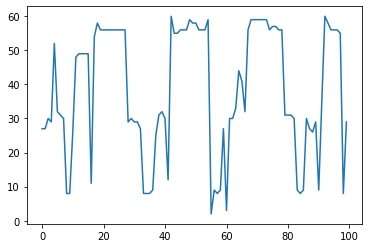

In [1]:
import pandas as pd

df1 = pd.read_json('policies.json', orient='records')
df2 = pd.read_json('divisions.json', orient='records')
df3 = pd.read_csv('senators.csv')
df4 = pd.read_csv('representatives.csv')

df2['aye_votes'].plot()

The above shows the voting patterns for the most recent 100 divisions, in order (covering a period of one week). In principle, divisions can be accumulated over years at this level of precision, allowing us to track the progress of individual bills through parliament, from the moment of first reading (where we can see who proposed the bill) to the moment they were either killed or passed -- and then we can see which politicians were responsible for the bill's fate.

Using the API to collect the data for all divisions and cross referencing it with data about the politicians themselves (also available from the same API, and from the government's public website data.gov.au, we can search for correlations with the contracts awarded by government departments in Resource2.